In [ ]:
# nice demo based on https://drscotthawley.github.io/blog/posts/2023-06-12-RVQ.html

In [15]:
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
np.random.seed(9) 
N_POINTS = 25
DATA_MIN, DATA_MAX = -0.5, 0.5
data = DATA_MIN + (DATA_MAX - DATA_MIN) * np.random.rand(N_POINTS, 2)

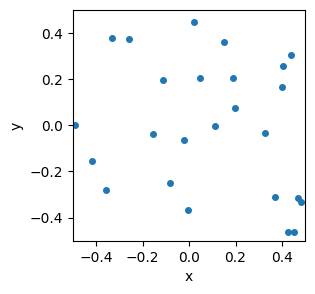

In [17]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_xlim(DATA_MIN, DATA_MAX)
ax.set_ylim(DATA_MIN, DATA_MAX)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.scatter(data[:, 0], data[:, 1], s=16)
plt.show()

In [19]:
import pandas as pd
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [26]:
np.random.seed(1)
n_dim = 2  # easier to do in 2d at first
n_points = 100
data_k = DATA_MIN + (DATA_MAX - DATA_MIN) * np.random.rand(n_points, n_dim)   # make up some random data points

# number of clusters has to be defined up front
k = 5       

# start with random centroids not too far from the edges
centroids = DATA_MIN + 0.2 + 0.6 * (DATA_MAX - DATA_MIN) * np.random.rand(k, n_dim)
orig_centroids = centroids.copy() # save these for later when we'll make a movie

# TODO replace this with something that doesn't throw errors
def plot_kmeans(data, centroids, cluster_memb=None): # we'll leave a way to color the data points
    all_data = np.concatenate((data,centroids))
    is_centroid = np.array([1 if i >= n_points else 0 for i in range(all_data.shape[0])], np.newaxis)
    sizes = is_centroid * 3 + 1
    cs = cluster_memb if cluster_memb is not None else -1 + np.zeros((data.shape[0], 1), dtype=int) 
    cs = np.append(cs, range(k)) # add the centroids
    plot_data = np.column_stack((all_data, sizes, cs))
    columns = ['x','y','sizes','cluster']
    df = pd.DataFrame( plot_data,  columns=columns)
    fig = px.scatter(df, x="x", y="y", color='cluster', size='sizes',  range_color=(-1,k),
            width=420, height=360, color_continuous_scale='Turbo')
    fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),)
    return fig

plot_kmeans(data_k, centroids)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('x=%{x}<br>y=%{y}<br>sizes=%{ma' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                                         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                                         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                                         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                                         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                                         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                                         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
                                         -1., -1.,  0.,  1.,  2.,  3.,  4.]),
                         'coloraxis': 'coloraxis',
                         'size': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 4., 4., 4., 4.]),
                         'sizemode': 'area',
                         'sizeref': 0.01,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([-0.082978  , -0.49988563, -0.35324411, -0.31373979, -0.10323253,
                          -0.08080549, -0.29554775, -0.47261241, -0.0826952 , -0.35961306,
                           0.30074457, -0.18657582,  0.37638915, -0.41495579, -0.33016958,
                          -0.40165317,  0.45788953,  0.19187711,  0.18650093, -0.48171172,
                           0.48886109, -0.21955601, -0.39677399,  0.4085955 , -0.21222466,
                          -0.48063304, -0.28837188, -0.00842684,  0.07411761,  0.08930554,
                          -0.39766557,  0.19440016, -0.45004654,  0.16379465,  0.44459476,
                           0.40340192, -0.36072365, -0.10232316,  0.42750858,  0.2508121 ,
                           0.38330609,  0.25094243, -0.23007211, -0.07190881,  0.1634415 ,
                          -0.38525403, -0.05008787, -0.0918632 ,  0.40337952, -0.49712967,
                          -0.1733551 ,  0.3859421 ,  0.40853515, -0.48417876,  0.19089692,
                          -0.32765949,  0.43259546, -0.43399983,  0.25387619,  0.21152476,
                          -0.48011987, -0.47169351,  0.36002795,  0.05282198, -0.37582668,
                           0.08575927,  0.06103022,  0.30063267,  0.3071052 ,  0.36354185,
                           0.05624023, -0.44008231, -0.45544812, -0.27429066,  0.05971698,
                          -0.42802572,  0.06810046, -0.24767426, -0.30457052,  0.47001999,
                          -0.26015224,  0.11995572, -0.34320861, -0.42997786,  0.10632946,
                          -0.18263759,  0.07974522,  0.05094822,  0.16923289, -0.43366517,
                           0.12971751,  0.25275555, -0.2396849 , -0.30656572,  0.02467031,
                          -0.23670323,  0.23506596,  0.40781585, -0.48604843,  0.11677836,
                           0.27010567,  0.24936381, -0.06599537,  0.06258629,  0.25570886]),
              'xaxis': 'x',
              'y': array([ 0.22032449, -0.19766743,